In [1]:
import pandas as pd # good for reading data and manipulating tables of data 
import matplotlib.pyplot as plt # the general plotting library
import numpy as np # for general math stuff
#import matplotlib.patches as mpatches
from itertools import cycle, islice
from statsmodels.stats.anova import AnovaRM
from scipy import stats

In [2]:
# for just one person 
path = "../data/Fragebogen.xlsx"

codes = pd.read_excel(path)
codes

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  gender  \
0   TA09BE        1         A   3   6   2  11   4   5  12  ...       m   
1   TA09BE        2         B   9   8  13   9  14   3   7  ...       m   
2   TA09BE        3         D  11   5  15   7   9   6   4  ...       m   
3   TA09BE        4         C   7   3   4   6   5   1  12  ...       m   
4   LU07NI        1         B   3   3  10  12   9   3  12  ...       m   
..     ...      ...       ...  ..  ..  ..  ..  ..  ..  ..  ...     ...   
59  GA06MA        4         A   4   4   1  14  13   5  15  ...       w   
60  DI09XA        1         D  12   3   1  12  12   3   6  ...       w   
61  DI09XA        2         A   6   3   1  15  12   1  15  ...       w   
62  DI09XA        3         C  12   3   1   8  10   3  15  ...       w   
63  DI09XA        4         B  10   3  14   7  12   1   4  ...       w   

    watcher   w1   w2   w3   bot   b1   b2   b3                usage  
0        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
1        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
2        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
3        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0      Einmal im Monat  
4        Ja  3.0  4.0  3.0    Ja  3.0  3.0  4.0      Einmal im Monat  
..      ...  ...  ...  ...   ...  ...  ...  ...                  ...  
59       Ja  2.0  3.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
60       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
61       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
62       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  
63       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN  Einmal in der Woche  

[64 rows x 26 columns]

In [3]:
task2 = codes
task2 = task2[codes['aufgabe']==2]
task2

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  gender  \
1   TA09BE        2         B   9   8  13   9  14   3   7  ...       m   
5   LU07NI        2         C  11   8  11  10   9   4   3  ...       m   
9   NA07WA        2         D   3   2   4  10  10   2   4  ...       m   
13  DA12JO        2         A  10   1   1   6   9  11   8  ...       w   
17  UT03AN        2         B   4   2  10  11  12   3   7  ...       w   
21  SI02HA        2         C   8   2   7   9   9   2  12  ...       w   
25  HI11JO        2         D   4   3  10   9  10   4  14  ...       m   
29  CL03RA        2         A   9  10   1  15  15   2  12  ...       m   
33  SU05DI        2         B   4   1   1  14  10   1  15  ...       w   
37  IR04VA        2         C  11   3   3  12  11   3  11  ...       m   
41  KE08ST        2         D  13   4  14  10  12   8   2  ...       m   
45  CH02OT        2         A   9   3   2   9  12   4  11  ...       w   
49  SA06JO        2         B  11   2   8  10  11   4  14  ...       m   
53  FI10GA        2         C   6   1   1  10  13   3  13  ...       w   
57  GA06MA        2         D   1   1   1  11   7   5  15  ...       w   
61  DI09XA        2         A   6   3   1  15  12   1  15  ...       w   

    watcher   w1   w2   w3   bot   b1   b2   b3                         usage  
1        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0               Einmal im Monat  
5        Ja  3.0  4.0  3.0    Ja  3.0  3.0  4.0               Einmal im Monat  
9        Ja  2.0  3.0  3.0  Nein  NaN  NaN  NaN                         Öfter  
13       Ja  3.0  4.0  2.0    Ja  1.0  3.0  2.0           Einmal in der Woche  
17       Ja  2.0  2.0  4.0  Nein  NaN  NaN  NaN               Einmal im Monat  
21       Ja  3.0  3.0  1.0  Nein  NaN  NaN  NaN               Einmal im Monat  
25       Ja  2.0  4.0  3.0  Nein  NaN  NaN  NaN               Einmal im Monat  
29       Ja  1.0  1.0  3.0    Ja  2.0  2.0  1.0                         Öfter  
33       Ja  2.0  2.0  3.0    Ja  1.0  1.0  3.0           Einmal in der Woche  
37       Ja  3.0  2.0  2.0  Nein  NaN  NaN  NaN               Einmal im Monat  
41       Ja  3.0  2.0  1.0  Nein  NaN  NaN  NaN                         Öfter  
45       Ja  1.0  2.0  2.0    Ja  1.0  2.0  2.0  Seltener als einmal im Monat  
49       Ja  2.0  3.0  2.0    Ja  4.0  4.0  2.0           Einmal in der Woche  
53     Nein  NaN  NaN  NaN  Nein  NaN  NaN  NaN  Seltener als einmal im Monat  
57       Ja  2.0  3.0  2.0  Nein  NaN  NaN  NaN           Einmal in der Woche  
61       Ja  2.0  4.0  2.0  Nein  NaN  NaN  NaN           Einmal in der Woche  

[16 rows x 26 columns]

In [42]:
other = codes
other = other[codes['aufgabe']!=2]
other

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  gender  \
0   TA09BE        1         A   3   6   2  11   4   5  12  ...       m   
2   TA09BE        3         D  11   5  15   7   9   6   4  ...       m   
3   TA09BE        4         C   7   3   4   6   5   1  12  ...       m   
4   LU07NI        1         B   3   3  10  12   9   3  12  ...       m   
6   LU07NI        3         A  11   6  11   5  10  11   8  ...       m   
7   LU07NI        4         D   5   6   4  13   6   3  14  ...       m   
8   NA07WA        1         C   2   2   4  11  12   2   7  ...       m   
10  NA07WA        3         B   3   2   5  10  11   2  10  ...       m   
11  NA07WA        4         A   3   2   9  10  11   1   9  ...       m   
12  DA12JO        1         D   3   1   1  10  10   6  10  ...       w   
14  DA12JO        3         C   1   1   1   8   8   1  12  ...       w   
15  DA12JO        4         B   1   1   9   1   4  15   2  ...       w   
16  UT03AN        1         A   2   2   2  13  13   3  12  ...       w   
18  UT03AN        3         D   5   2   2  13  11   3  13  ...       w   
19  UT03AN        4         C   9   9   3  10   6   5  14  ...       w   
20  SI02HA        1         B   3   2   1  10   8   2   6  ...       w   
22  SI02HA        3         A   3   2   2  10   7   2  12  ...       w   
23  SI02HA        4         D   3   2   2  11   8   1  13  ...       w   
24  HI11JO        1         C   3   3   7  13  11   3  12  ...       m   
26  HI11JO        3         B   3   3  10  11  10   2  11  ...       m   
27  HI11JO        4         A   3   3  12  11  12   2  12  ...       m   
28  CL03RA        1         D   3   5   3  12  15  13   9  ...       m   
30  CL03RA        3         C   6   9   2  13  13   7   8  ...       m   
31  CL03RA        4         B   2   4   1  10  12   3  13  ...       m   
32  SU05DI        1         A   4   1   1  14  10   1  15  ...       w   
34  SU05DI        3         D   4   1   1   9   9   1  15  ...       w   
35  SU05DI        4         C   7   1   1   7   9   4  15  ...       w   
36  IR04VA        1         B   1   1   1   4   7   1  11  ...       m   
38  IR04VA        3         A   3   3   4   7  10   1   6  ...       m   
39  IR04VA        4         D   3   3  12   5  15   1   2  ...       m   
40  KE08ST        1         C   4   1   1  11  11  12   4  ...       m   
42  KE08ST        3         B   3   1   1  12   3   3  14  ...       m   
43  KE08ST        4         A  11   4  11  10  12   7   3  ...       m   
44  CH02OT        1         D   3   4   1  10  12   5  14  ...       w   
46  CH02OT        3         C   2   5   7  13  13   8  14  ...       w   
47  CH02OT        4         B  12   3   5   3  11   5   3  ...       w   
48  SA06JO        1         A   6   2   2  13   7   3  11  ...       m   
50  SA06JO        3         D   7   2  11  11   7   3   9  ...       m   
51  SA06JO        4         C  11   2   6   9  10   4  14  ...       m   
52  FI10GA        1         B   6   1   4   9  11   2  11  ...       w   
54  FI10GA        3         A  13   7   1   7  10  11  12  ...       w   
55  FI10GA        4         D   3   1   2   9  11   2   8  ...       w   
56  GA06MA        1         C   2   2   1  14  10   4  15  ...       w   
58  GA06MA        3         B   1   1   1  13  11   4  15  ...       w   
59  GA06MA        4         A   4   4   1  14  13   5  15  ...       w   
60  DI09XA        1         D  12   3   1  12  12   3   6  ...       w   
62  DI09XA        3         C  12   3   1   8  10   3  15  ...       w   
63  DI09XA        4         B  10   3  14   7  12   1   4  ...       w   

    watcher   w1   w2   w3   bot   b1   b2   b3                         usage  
0        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0               Einmal im Monat  
2        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0               Einmal im Monat  
3        Ja  3.0  3.0  1.0    Ja  3.0  3.0  1.0               Einmal im Monat  
4        Ja  3.0  4.0  3.0    Ja  3.0  3.0  4.0              

## F1

In [43]:
df = task2[['condition','F1']]
x = df.groupby('condition').describe()
x

F1                                             
          count  mean       std  min   25%  50%    75%   max
condition                                                   
A           4.0  8.50  1.732051  6.0  8.25  9.0   9.25  10.0
B           4.0  7.00  3.559026  4.0  4.00  6.5   9.50  11.0
C           4.0  9.00  2.449490  6.0  7.50  9.5  11.00  11.0
D           4.0  5.25  5.315073  1.0  2.50  3.5   6.25  13.0

In [44]:
df = task2[['condition','F1']]
a_count = df[codes['condition']=='A']
a_count = a_count[['F1']].to_numpy()

<ipython-input-44-1ab9d97ea93c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_count = df[codes['condition']=='A']


In [45]:
df = task2[['condition','F1']]
a_count = df[codes['condition']=='A']
a_count = a_count[['F1']].to_numpy()
b_count = df[codes['condition']=='B']
b_count = b_count[['F1']].to_numpy()
c_count = df[codes['condition']=='C']
c_count = c_count[['F1']].to_numpy()
d_count = df[codes['condition']=='D']
d_count = d_count[['F1']].to_numpy()
print(a_count.T)
stat, p = stats.bartlett(a_count.T[0], b_count.T[0], c_count.T[0], d_count.T[0])
print(stat)
print(p)

[[10  9  9  6]]
3.4923598128439277
0.3217543802019673


<ipython-input-45-f87e801e3b0c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_count = df[codes['condition']=='A']
<ipython-input-45-f87e801e3b0c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b_count = df[codes['condition']=='B']
<ipython-input-45-f87e801e3b0c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_count = df[codes['condition']=='C']
<ipython-input-45-f87e801e3b0c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_count = df[codes['condition']=='D']


In [46]:
df = other[['condition','F1']]
df.groupby('condition').describe()

F1                                                
          count      mean       std  min   25%  50%   75%   max
condition                                                      
A          12.0  5.500000  3.872983  2.0  3.00  3.5  7.25  13.0
B          12.0  4.000000  3.567530  1.0  1.75  3.0  3.75  12.0
C          12.0  5.500000  3.753786  1.0  2.00  5.0  7.50  12.0
D          12.0  5.166667  3.214550  3.0  3.00  3.5  5.50  12.0

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

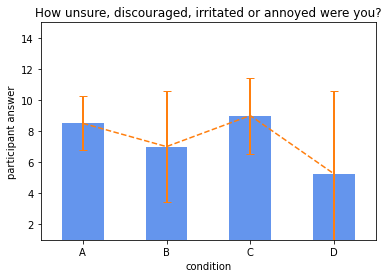

In [47]:
df = task2[['condition','F1']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

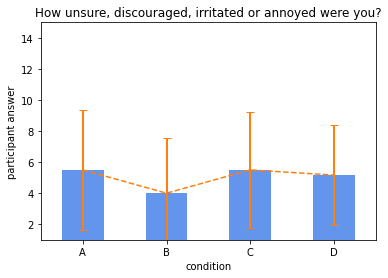

In [48]:
df = other[['condition','F1']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

## F5

<AxesSubplot:title={'center':'How hard did you try?'}, xlabel='condition', ylabel='participant answer'>

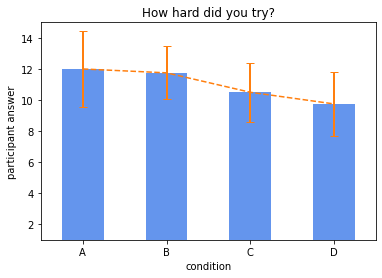

In [49]:
df = task2[['condition','F5']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How hard did you try?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'How hard did you try?'}, xlabel='condition', ylabel='participant answer'>

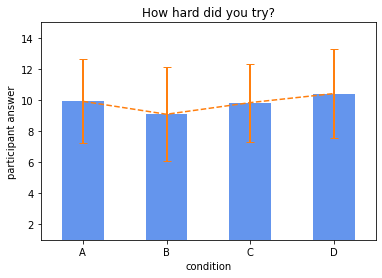

In [50]:
df = other[['condition','F5']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How hard did you try?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

## F6

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

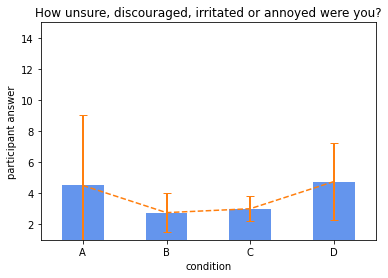

In [51]:
df = task2[['condition','F6']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

<AxesSubplot:title={'center':'How unsure, discouraged, irritated or annoyed were you?'}, xlabel='condition', ylabel='participant answer'>

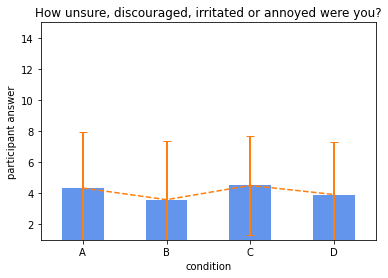

In [52]:
df = other[['condition','F6']]
gp3 = df.groupby('condition')
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.line(ax=ax,style ="--", color="tab:orange", legend=False)
means.plot.bar(title = "How unsure, discouraged, irritated or annoyed were you?",legend=False,ylabel='participant answer',ylim=(1,15),yerr=errors, ax=ax, capsize=4, rot=0, color=['cornflowerblue'],error_kw=dict(ecolor='tab:orange',lw=2))

In [53]:
path = "../data/survey.xlsx" # + vp + "/code_overview.xlsx"
vp = 'vp_1'
file = path + vp + "/code_overview.xlsx"

codes2 = pd.read_excel(path)
codes2

Zeitstempel      id  age    gender  \
0  2022-06-13 12:55:03.008  TA09BE   23  männlich   
1  2022-06-16 12:54:06.251  LU07NI   20  männlich   
2  2022-06-16 13:56:00.935  NA07WA   26  männlich   
3  2022-06-17 12:59:33.194  DA12JO   20  weiblich   
4  2022-06-17 13:56:02.722  UT03AN   29  weiblich   
5  2022-06-17 15:53:57.534  SI02HA   26  weiblich   
6  2022-06-17 16:53:28.806  HI11JO   25  männlich   
7  2022-06-21 11:55:37.510  CL03RA   24  männlich   
8  2022-06-21 16:26:12.548  SU05DI   24  weiblich   
9  2022-06-28 12:47:27.846  IR04VA   21  männlich   
10 2022-06-28 15:31:05.186  KE08ST   23  männlich   
11 2022-06-29 12:30:01.195  CH02OT   23  weiblich   
12 2022-06-29 14:57:05.088  SA06JO   25  männlich   

                          occup experience                         usage  \
0                    Student*in         Ja               Einmal im Monat   
1                    Student*in         Ja               Einmal im Monat   
2                    Student*in         Ja                         Öfter   
3                    Student*in         Ja           Einmal in der Woche   
4                    Student*in         Ja               Einmal im Monat   
5   Student*in, Arbeitnehmer*in         Ja               Einmal im Monat   
6                    Student*in         Ja               Einmal im Monat   
7                    Student*in         Ja                         Öfter   
8   Student*in, Arbeitnehmer*in         Ja           Einmal in der Woche   
9                    Student*in         Ja               Einmal im Monat   
10                   Student*in         Ja                         Öfter   
11                   Student*in         Ja  Seltener als einmal im Monat   
12  Student*in, Arbeitnehmer*in         Ja           Einmal in der Woche   

                                                 fave  \
0                Schreibe eine Geschichte mit 3 Nomen   
1                Schreibe eine Geschichte mit 3 Nomen   
2                Schreibe eine Geschichte mit 3 Nomen   
3                Schreibe eine Geschichte mit 3 Nomen   
4                Schreibe eine Geschichte mit 3 Nomen   
5   Schreibe über deinen Lieblingsfilm /-serie ode...   
6   Schreibe über deinen letzten Urlaub/deine letz...   
7                Schreibe eine Geschichte mit 3 Nomen   
8                Schreibe eine Geschichte mit 3 Nomen   
9   Schreibe über deinen Lieblingsfilm /-serie ode...   
10  Schreibe über deinen Lieblingsfilm /-serie ode...   
11     Schreibe über deine Heimatstadt/deinen Wohnort   
12     Schreibe über deine Heimatstadt/deinen Wohnort   

                                                 hate  \
0   Schreibe über deinen Lieblingsfilm /-serie ode...   
1   Schreibe über deinen letzten Urlaub/deine letz...   
2      Schreibe über deine Heimatstadt/deinen Wohnort   
3   Schreibe über deinen Lieblingsfilm /-serie ode...   
4   Schreibe über deinen Lieblingsfilm /-serie ode...   
5                Schreibe eine Geschichte mit 3 Nomen   
6                Schreibe eine Geschichte mit 3 Nomen   
7   Schreibe über deinen letzten Urlaub/deine letz...   
8   Schreibe über deinen Lieblingsfilm /-serie ode...   
9                Schreibe eine Geschichte mit 3 Nomen   
10     Schreibe über deine Heimatstadt/deinen Wohnort   
11  Schreibe über deinen Lieblingsfilm /-serie ode...   
12               Schreibe eine Geschichte mit 3 Nomen   

                                                 best  ...  \
0                Schreibe eine Geschichte mit 3 Nomen  ...   
1      Schreibe über deine Heimatstadt/deinen Wohnort  ...   
2                Schreibe eine Geschichte mit 3 Nomen  ...   
3      Schreibe über deine Heimatstadt/deinen Wohnort  ...   
4                Schreibe eine Geschichte mit 3 Nomen  ...   
5   Schreibe über deinen Lieblingsfilm /-serie ode...  ...   
6   Schreibe über deinen letzten Urlaub/deine letz...  ...   
7                Schreibe eine Geschichte mit 3 Nomen  ...   
8                Schreibe eine Geschichte mit 3 Nom